# Plotting input variables from GFDL-MOM6-COBALT2
**Author**: Denisse Fierro Arcos  
**Date**: 2026-01-14  

## Loading relevant libraries

In [1]:
import os
os.chdir('/g/data/vf71/la6889/dbpm_southern_ocean/scripts/')
from glob import glob
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import re
import cmocean as cm
import matplotlib.patheffects as PathEffects
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cft

## Defining base variables

In [2]:
# Parent folder where all input variables are stored
base_dir = '/g/data/vf71/la6889/dbpm_inputs'
# Input resolution
res = '15arcmin'
# FAO sectors
reg_names = ['weddell', 'east_antarctica', 'west_antarctica']
# Land layer for maps
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m', edgecolor = 'black', 
                                   facecolor = 'gray', linewidth = 0.5)

## Depth-integrated total phytoplankton (`phyc-vint`) and picopythoplankton (`phypico-vint`)

In [7]:
phypico_files = glob(os.path.join(base_dir, '*', 'gridded', '*', f'*obs*sphy_{res}*_1961*'))
lphy_files = glob(os.path.join(base_dir, '*', 'gridded', '*', f'*obs*lphy_{res}*_1961*'))

In [8]:
ds_pico = {}
ds_tot = {}
for pico, large in zip(phypico_files, lphy_files):
    [reg] = re.findall('inputs/(.*)/gr', pico)
    da_pico = xr.open_zarr(pico)['sphy']
    da_large = xr.open_zarr(large)['lphy']
    ds_tot[reg] = (da_pico+da_large).mean('time')
    ds_pico[reg] = da_pico.mean('time')

### Plotting `phypico-vint`

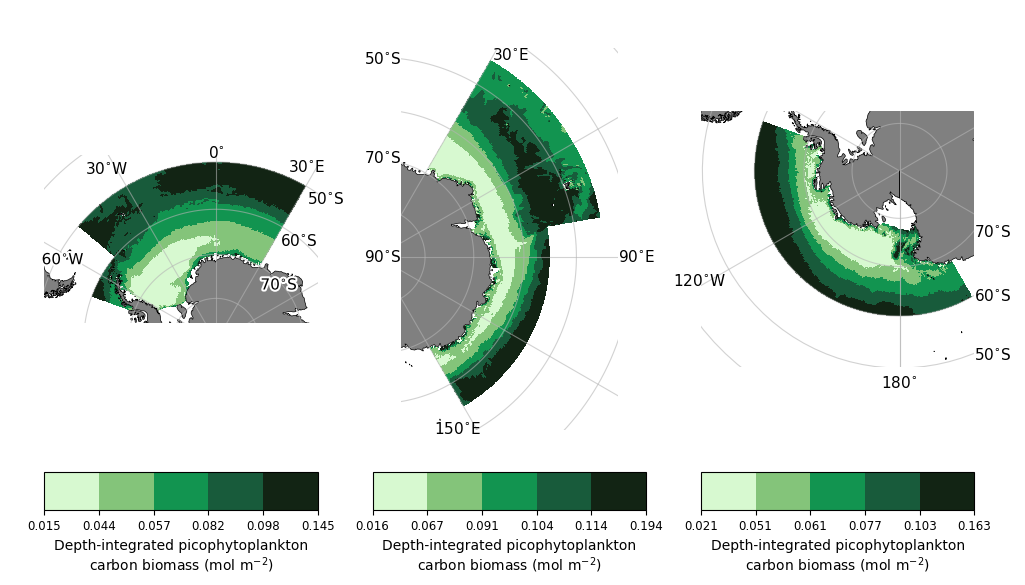

In [150]:
fig = plt.figure(figsize = (12, 6))

gs = gridspec.GridSpec(nrows = 2, ncols = 3, height_ratios = (1, 0.1))

ax = {}
plots = {}
for i, r in enumerate(reg_names):
    ax[i] = fig.add_subplot(gs[i], projection = ccrs.SouthPolarStereo())
    da = ds_pico[r]
    levels = da.quantile(np.arange(0, 1.1, 0.2)).values
    plots[r] = da.plot(ax = ax[i], transform = ccrs.PlateCarree(), cmap = cm.cm.algae, levels = levels, 
                       add_colorbar = False)
    ax[i].add_feature(land_50m)

    cbar = fig.colorbar(plots[r], cax = plt.subplot(gs[i+3]), 
                    orientation = 'horizontal', pad = 0.05, format = '%.3f')
    cbar.set_label('Depth-integrated picophytoplankton\ncarbon biomass (mol m$^{-2}$)', y = .95)
    cbar.ax.tick_params(labelsize = 8.5)

    coord_lab = 11
    if r == 'weddell':
        ax[i].set_extent([-65, 32.5, -80, -48], crs = ccrs.PlateCarree())
        plt.text(0.15, 0.89, '$30^{\circ}$W', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.01, 0.35, '$60^{\circ}$W', transform = ax[i].transAxes, 
                 fontsize = coord_lab, 
                 path_effects = [PathEffects.withStroke(linewidth = 3, foreground = 'w')])
        plt.text(0.60, 0.98, '$0^{\circ}$', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.89, 0.9, '$30^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.79, 0.2, '$70^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab,
                 path_effects = [PathEffects.withStroke(linewidth = 3, foreground = 'w')])
        plt.text(0.86, 0.46, '$60^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.96, 0.71, '$50^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
    elif 'east' in r:
        ax[i].set_extent([30, 136, -80, -42.5], crs = ccrs.PlateCarree())
        plt.text(-0.17, 0.96, '$50^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.17, 0.7, '$70^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.17, 0.44, '$90^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.42, 0.97, '$30^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(1, 0.44, '$90^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.15, -0.01, '$150^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
    else:
        ax[i].set_extent([158, 287.5, -80, -49.5], crs = ccrs.PlateCarree())
        plt.text(1, 0.51, '$70^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(1, 0.26, '$60^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(1, 0.03, '$50^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.1, 0.32, '$120^{\circ}$W', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.66, -0.08, '$180^{\circ}$', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        
        ax[i].set_title('')

    #Remove border around map
    [s.set_visible(False) for s in ax[i].spines.values()]
    gl = ax[i].gridlines(draw_labels = True, y_inline = False, color = "#b4b4b4", alpha = 0.6)
    # #Removing coordinate labels for latitude and longitude
    gl.xlabel_style = {'alpha': 0}
    gl.ylabel_style = {'alpha': 0}

fout = os.path.join('../outputs', f'mean_phypico-vint_1961-2010_{res}.png')
plt.savefig(fout, dpi = 300, bbox_inches = 'tight', pad_inches = 0.05)

### Plotting `phyc-vint`

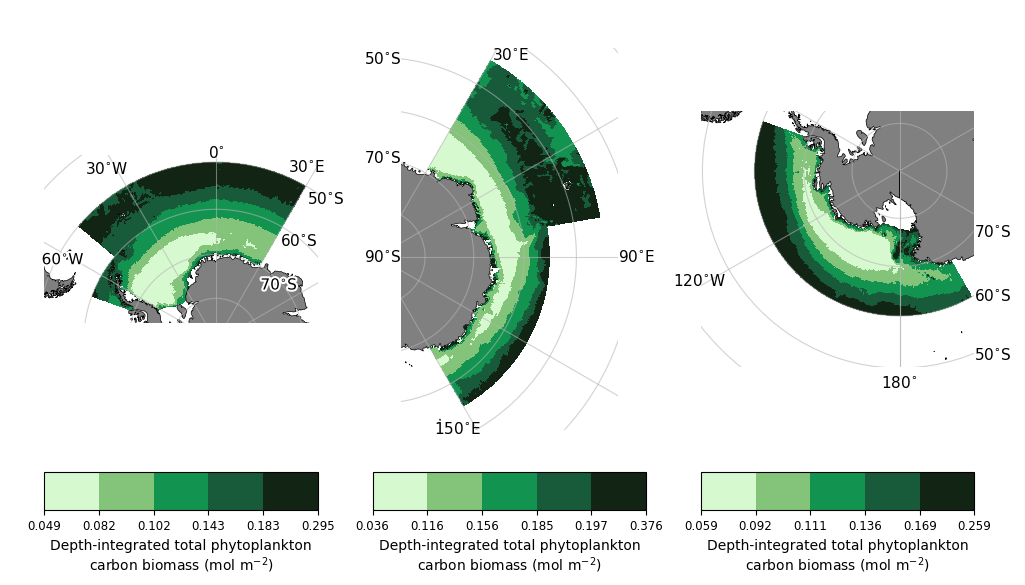

In [152]:
fig = plt.figure(figsize = (12, 6))

gs = gridspec.GridSpec(nrows = 2, ncols = 3, height_ratios = (1, 0.1))

ax = {}
plots = {}
for i, r in enumerate(reg_names):
    ax[i] = fig.add_subplot(gs[i], projection = ccrs.SouthPolarStereo())
    da = ds_tot[r]
    levels = da.quantile(np.arange(0, 1.1, 0.2)).values
    plots[r] = da.plot(ax = ax[i], transform = ccrs.PlateCarree(), cmap = cm.cm.algae, levels = levels, 
                       add_colorbar = False)
    ax[i].add_feature(land_50m)

    cbar = fig.colorbar(plots[r], cax = plt.subplot(gs[i+3]), 
                    orientation = 'horizontal', pad = 0.05, format = '%.3f')
    cbar.set_label('Depth-integrated total phytoplankton\ncarbon biomass (mol m$^{-2}$)', y = .95)
    cbar.ax.tick_params(labelsize = 8.5)

    coord_lab = 11
    if r == 'weddell':
        ax[i].set_extent([-65, 32.5, -80, -48], crs = ccrs.PlateCarree())
        plt.text(0.15, 0.89, '$30^{\circ}$W', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.01, 0.35, '$60^{\circ}$W', transform = ax[i].transAxes, 
                 fontsize = coord_lab, 
                 path_effects = [PathEffects.withStroke(linewidth = 3, foreground = 'w')])
        plt.text(0.60, 0.98, '$0^{\circ}$', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.89, 0.9, '$30^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.79, 0.2, '$70^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab,
                 path_effects = [PathEffects.withStroke(linewidth = 3, foreground = 'w')])
        plt.text(0.86, 0.46, '$60^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.96, 0.71, '$50^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
    elif 'east' in r:
        ax[i].set_extent([30, 136, -80, -42.5], crs = ccrs.PlateCarree())
        plt.text(-0.17, 0.96, '$50^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.17, 0.7, '$70^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.17, 0.44, '$90^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.42, 0.97, '$30^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(1, 0.44, '$90^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.15, -0.01, '$150^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
    else:
        ax[i].set_extent([158, 287.5, -80, -49.5], crs = ccrs.PlateCarree())
        plt.text(1, 0.51, '$70^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(1, 0.26, '$60^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(1, 0.03, '$50^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.1, 0.32, '$120^{\circ}$W', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.66, -0.08, '$180^{\circ}$', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        
        ax[i].set_title('')

    #Remove border around map
    [s.set_visible(False) for s in ax[i].spines.values()]
    gl = ax[i].gridlines(draw_labels = True, y_inline = False, color = "#b4b4b4", alpha = 0.6)
    # #Removing coordinate labels for latitude and longitude
    gl.xlabel_style = {'alpha': 0}
    gl.ylabel_style = {'alpha': 0}

fout = os.path.join('../outputs', f'mean_phyc-vint_1961-2010_{res}.png')
plt.savefig(fout, dpi = 300, bbox_inches = 'tight', pad_inches = 0.05)

## Sea surface temperature (`tos`) and bottom sea temperature (`tob`)

In [181]:
tos_files = glob(os.path.join(base_dir, '*', 'gridded', '*', f'*obs*tos_{res}*_1961*'))
tob_files = glob(os.path.join(base_dir, '*', 'gridded', '*', f'*obs*tob_{res}*_1961*'))

In [183]:
ds_tos = {}
ds_tob = {}
for s, b in zip(tos_files, tob_files):
    [reg] = re.findall('inputs/(.*)/gr', s)
    ds_tos[reg] = xr.open_zarr(s)['tos'].mean('time')
    ds_tob[reg] = xr.open_zarr(b)['tob'].mean('time')

### Plotting `tos`

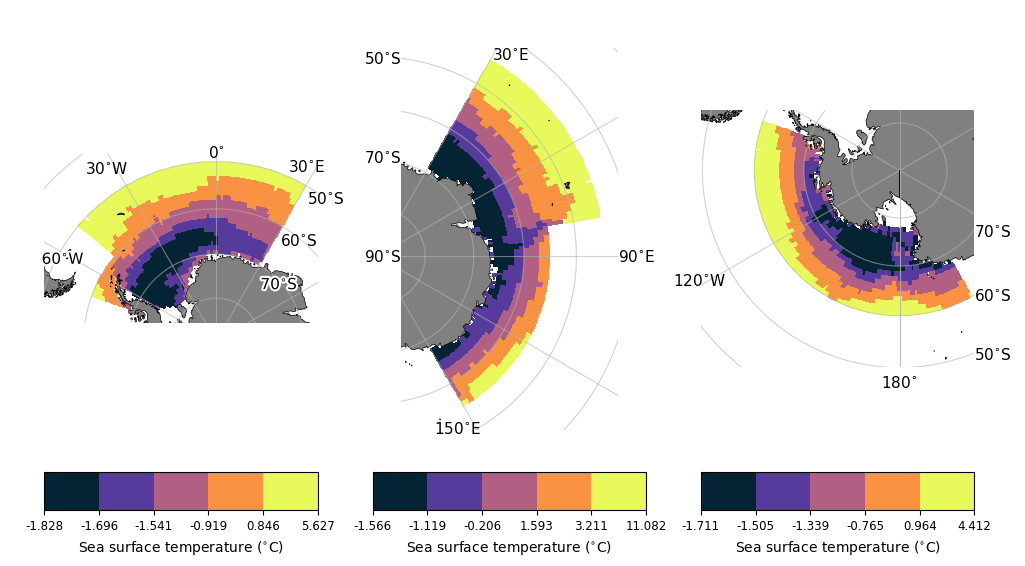

In [184]:
fig = plt.figure(figsize = (12, 6))

gs = gridspec.GridSpec(nrows = 2, ncols = 3, height_ratios = (1, 0.1))

ax = {}
plots = {}
for i, r in enumerate(reg_names):
    ax[i] = fig.add_subplot(gs[i], projection = ccrs.SouthPolarStereo())
    da = ds_tos[r]
    levels = da.quantile(np.arange(0, 1.1, 0.2)).values
    plots[r] = da.plot(ax = ax[i], transform = ccrs.PlateCarree(), cmap = cm.cm.thermal, levels = levels, 
                       add_colorbar = False)
    ax[i].add_feature(land_50m)

    cbar = fig.colorbar(plots[r], cax = plt.subplot(gs[i+3]), 
                    orientation = 'horizontal', pad = 0.05, format = '%.3f')
    cbar.set_label('Sea surface temperature ($^{\circ}$C)', y = .95)
    cbar.ax.tick_params(labelsize = 8.5)

    coord_lab = 11
    if r == 'weddell':
        ax[i].set_extent([-65, 32.5, -80, -48], crs = ccrs.PlateCarree())
        plt.text(0.15, 0.89, '$30^{\circ}$W', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.01, 0.35, '$60^{\circ}$W', transform = ax[i].transAxes, 
                 fontsize = coord_lab, 
                 path_effects = [PathEffects.withStroke(linewidth = 3, foreground = 'w')])
        plt.text(0.60, 0.98, '$0^{\circ}$', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.89, 0.9, '$30^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.79, 0.2, '$70^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab,
                 path_effects = [PathEffects.withStroke(linewidth = 3, foreground = 'w')])
        plt.text(0.86, 0.46, '$60^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.96, 0.71, '$50^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
    elif 'east' in r:
        ax[i].set_extent([30, 136, -80, -42.5], crs = ccrs.PlateCarree())
        plt.text(-0.17, 0.96, '$50^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.17, 0.7, '$70^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.17, 0.44, '$90^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.42, 0.97, '$30^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(1, 0.44, '$90^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.15, -0.01, '$150^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
    else:
        ax[i].set_extent([158, 287.5, -80, -49.5], crs = ccrs.PlateCarree())
        plt.text(1, 0.51, '$70^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(1, 0.26, '$60^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(1, 0.03, '$50^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.1, 0.32, '$120^{\circ}$W', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.66, -0.08, '$180^{\circ}$', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        
        ax[i].set_title('')

    #Remove border around map
    [s.set_visible(False) for s in ax[i].spines.values()]
    gl = ax[i].gridlines(draw_labels = True, y_inline = False, color = "#b4b4b4", alpha = 0.6)
    # #Removing coordinate labels for latitude and longitude
    gl.xlabel_style = {'alpha': 0}
    gl.ylabel_style = {'alpha': 0}

fout = os.path.join('../outputs', f'mean_tos_1961-2010_{res}.png')
plt.savefig(fout, dpi = 300, bbox_inches = 'tight', pad_inches = 0.05)

### Plotting `tob`

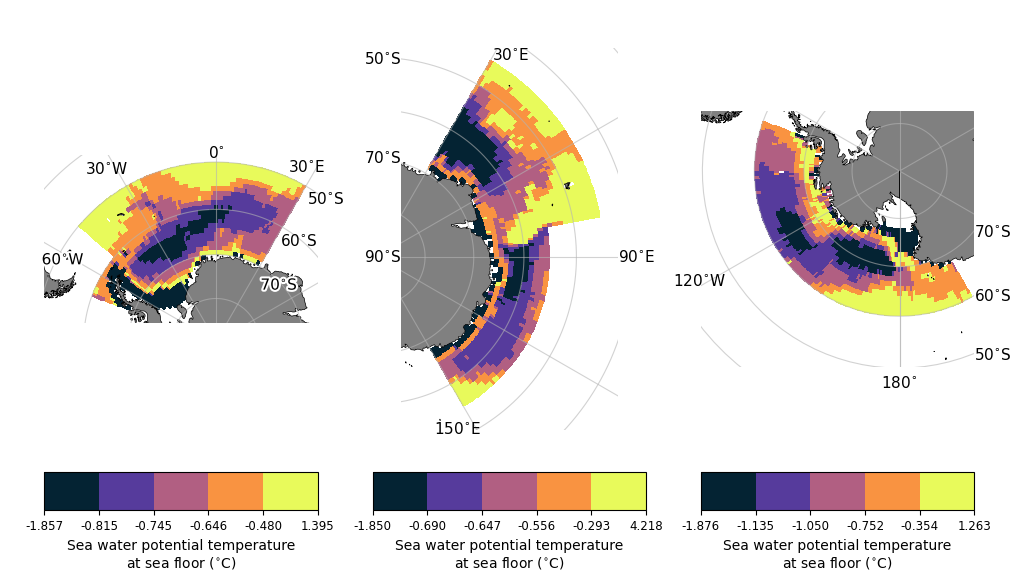

In [185]:
fig = plt.figure(figsize = (12, 6))

gs = gridspec.GridSpec(nrows = 2, ncols = 3, height_ratios = (1, 0.1))

ax = {}
plots = {}
for i, r in enumerate(reg_names):
    ax[i] = fig.add_subplot(gs[i], projection = ccrs.SouthPolarStereo())
    da = ds_tob[r]
    levels = da.quantile(np.arange(0, 1.1, 0.2)).values
    plots[r] = da.plot(ax = ax[i], transform = ccrs.PlateCarree(), cmap = cm.cm.thermal, levels = levels, 
                       add_colorbar = False)
    ax[i].add_feature(land_50m)

    cbar = fig.colorbar(plots[r], cax = plt.subplot(gs[i+3]), 
                    orientation = 'horizontal', pad = 0.05, format = '%.3f')
    cbar.set_label('Sea water potential temperature\nat sea floor ($^{\circ}$C)', y = .95)
    cbar.ax.tick_params(labelsize = 8.5)

    coord_lab = 11
    if r == 'weddell':
        ax[i].set_extent([-65, 32.5, -80, -48], crs = ccrs.PlateCarree())
        plt.text(0.15, 0.89, '$30^{\circ}$W', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.01, 0.35, '$60^{\circ}$W', transform = ax[i].transAxes, 
                 fontsize = coord_lab, 
                 path_effects = [PathEffects.withStroke(linewidth = 3, foreground = 'w')])
        plt.text(0.60, 0.98, '$0^{\circ}$', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.89, 0.9, '$30^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.79, 0.2, '$70^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab,
                 path_effects = [PathEffects.withStroke(linewidth = 3, foreground = 'w')])
        plt.text(0.86, 0.46, '$60^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.96, 0.71, '$50^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
    elif 'east' in r:
        ax[i].set_extent([30, 136, -80, -42.5], crs = ccrs.PlateCarree())
        plt.text(-0.17, 0.96, '$50^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.17, 0.7, '$70^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.17, 0.44, '$90^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.42, 0.97, '$30^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(1, 0.44, '$90^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.15, -0.01, '$150^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
    else:
        ax[i].set_extent([158, 287.5, -80, -49.5], crs = ccrs.PlateCarree())
        plt.text(1, 0.51, '$70^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(1, 0.26, '$60^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(1, 0.03, '$50^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.1, 0.32, '$120^{\circ}$W', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.66, -0.08, '$180^{\circ}$', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        
        ax[i].set_title('')

    #Remove border around map
    [s.set_visible(False) for s in ax[i].spines.values()]
    gl = ax[i].gridlines(draw_labels = True, y_inline = False, color = "#b4b4b4", alpha = 0.6)
    # #Removing coordinate labels for latitude and longitude
    gl.xlabel_style = {'alpha': 0}
    gl.ylabel_style = {'alpha': 0}

fout = os.path.join('../outputs', f'mean_tob_1961-2010_{res}.png')
plt.savefig(fout, dpi = 300, bbox_inches = 'tight', pad_inches = 0.05)

## Sea ice area fraction (`siconc`)

In [3]:
si_files = glob(os.path.join(base_dir, '*', 'gridded', '*', f'*obs*siconc_{res}*_1961*'))
ds_sic = {}
for f in si_files:
    [reg] = re.findall('inputs/(.*)/gr', f)
    ds_sic[reg] = xr.open_zarr(f)['siconc'].mean('time')

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.12/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml


### Plotting `siconc`

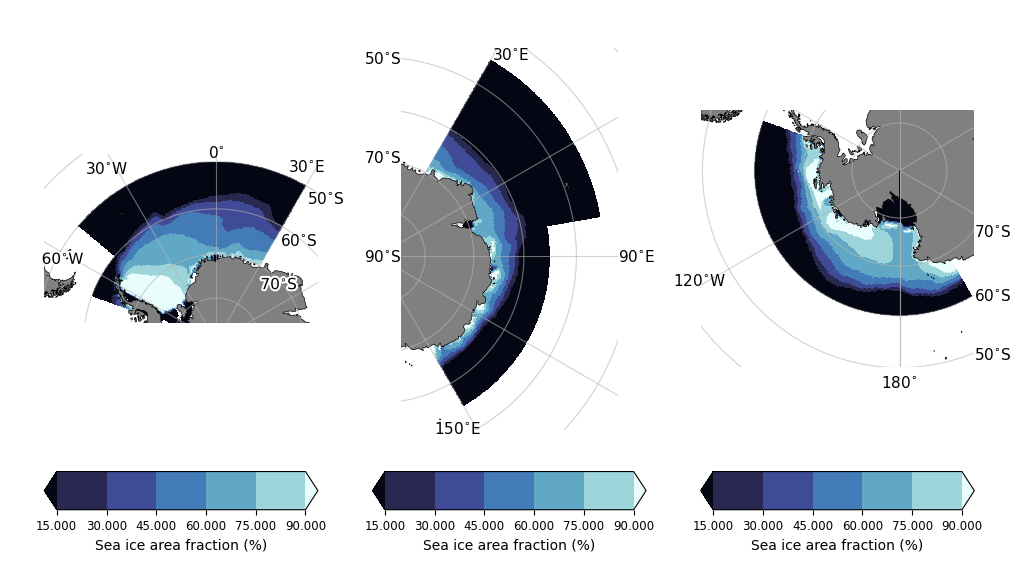

In [6]:
fig = plt.figure(figsize = (12, 6))

gs = gridspec.GridSpec(nrows = 2, ncols = 3, height_ratios = (1, 0.1))
levels = np.arange(15, 101, 15)

ax = {}
plots = {}
for i, r in enumerate(reg_names):
    ax[i] = fig.add_subplot(gs[i], projection = ccrs.SouthPolarStereo())
    da = ds_sic[r]
    # levels = da.quantile(np.arange(0, 1.1, 0.2)).values
    plots[r] = da.plot(ax = ax[i], transform = ccrs.PlateCarree(), cmap = cm.cm.ice, levels = levels, 
                       add_colorbar = False)
    ax[i].add_feature(land_50m)

    cbar = fig.colorbar(plots[r], cax = plt.subplot(gs[i+3]), 
                    orientation = 'horizontal', pad = 0.05, format = '%.3f')
    cbar.set_label('Sea ice area fraction (%)', y = .95)
    cbar.ax.tick_params(labelsize = 8.5)

    coord_lab = 11
    if r == 'weddell':
        ax[i].set_extent([-65, 32.5, -80, -48], crs = ccrs.PlateCarree())
        plt.text(0.15, 0.89, '$30^{\circ}$W', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.01, 0.35, '$60^{\circ}$W', transform = ax[i].transAxes, 
                 fontsize = coord_lab, 
                 path_effects = [PathEffects.withStroke(linewidth = 3, foreground = 'w')])
        plt.text(0.60, 0.98, '$0^{\circ}$', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.89, 0.9, '$30^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.79, 0.2, '$70^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab,
                 path_effects = [PathEffects.withStroke(linewidth = 3, foreground = 'w')])
        plt.text(0.86, 0.46, '$60^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.96, 0.71, '$50^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
    elif 'east' in r:
        ax[i].set_extent([30, 136, -80, -42.5], crs = ccrs.PlateCarree())
        plt.text(-0.17, 0.96, '$50^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.17, 0.7, '$70^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.17, 0.44, '$90^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.42, 0.97, '$30^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(1, 0.44, '$90^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.15, -0.01, '$150^{\circ}$E', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
    else:
        ax[i].set_extent([158, 287.5, -80, -49.5], crs = ccrs.PlateCarree())
        plt.text(1, 0.51, '$70^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(1, 0.26, '$60^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(1, 0.03, '$50^{\circ}$S', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(-0.1, 0.32, '$120^{\circ}$W', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        plt.text(0.66, -0.08, '$180^{\circ}$', transform = ax[i].transAxes, 
                 fontsize = coord_lab)
        
        ax[i].set_title('')

    #Remove border around map
    [s.set_visible(False) for s in ax[i].spines.values()]
    gl = ax[i].gridlines(draw_labels = True, y_inline = False, color = "#b4b4b4", alpha = 0.6)
    # #Removing coordinate labels for latitude and longitude
    gl.xlabel_style = {'alpha': 0}
    gl.ylabel_style = {'alpha': 0}

fout = os.path.join('../outputs', f'mean_siconc_1961-2010_{res}.png')
plt.savefig(fout, dpi = 300, bbox_inches = 'tight', pad_inches = 0.05)

In [35]:
res = '025deg'
runs = '_simask'
#Catches - monthly
catch_month_all = xr.open_zarr('/g/data/vf71/la6889/dbpm_inputs/weddell/gridded_dbpm_outputs/025deg/total_catches_simask_025deg_fao-48_1841_2010.zarr/')

In [40]:
catch = catch_month_all['total_catches'].sel(time = slice('1961', '2010'))

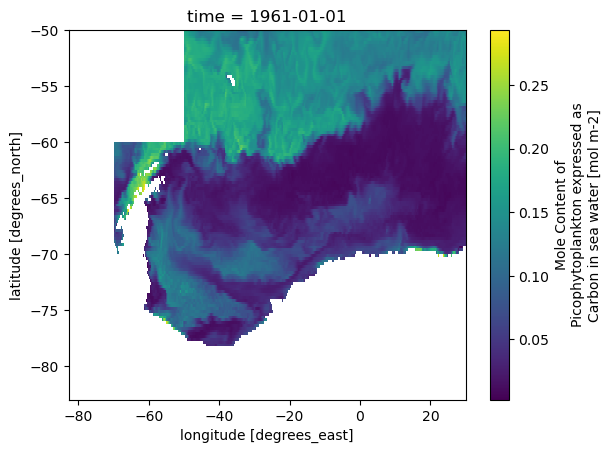

In [14]:
da_pico.isel(time = 0).plot()

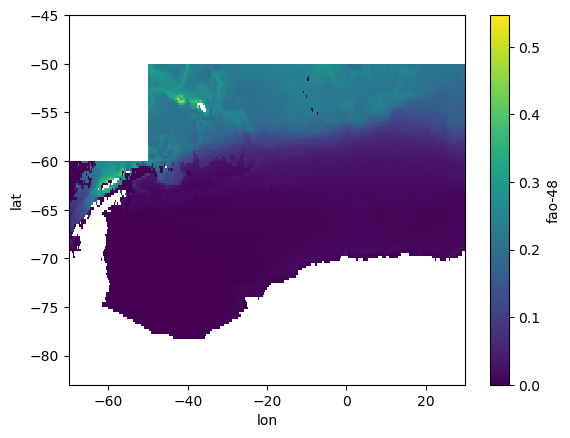

In [28]:
catch_month_all['fao-48'].dropna('lon', how = 'all').plot()

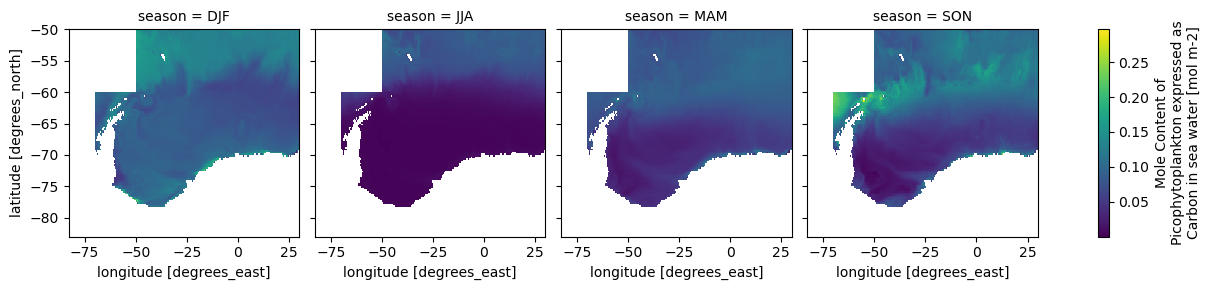

In [45]:
da_pico.groupby('time.season').mean('time').plot(col = 'season')

In [53]:
catch

<xarray.DataArray 'total_catches' (lat: 132, lon: 451, time: 600)> Size: 286MB
dask.array<getitem, shape=(132, 451, 600), dtype=float64, chunksize=(132, 451, 12), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 1kB -50.12 -50.38 -50.62 ... -82.38 -82.62 -82.88
  * lon      (lon) float64 4kB -82.62 -82.38 -82.12 -81.88 ... 29.38 29.62 29.88
  * time     (time) datetime64[ns] 5kB 1961-01-01 1961-02-01 ... 2010-12-01

In [60]:
test = xr.Dataset({'pico': da_pico, 'catch': catch})
da_cor = {}
for s, da in test.groupby('time.season'):
    da_cor[s] = xr.corr(da['catch'], da['pico'], dim = 'time')

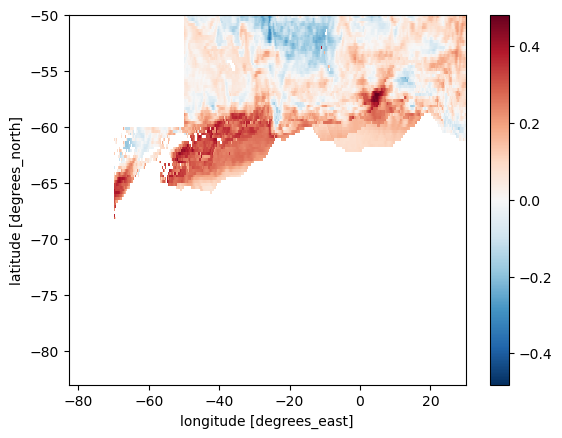

In [59]:
xr.corr(da['catch'], da['pico'], dim = 'time').plot()

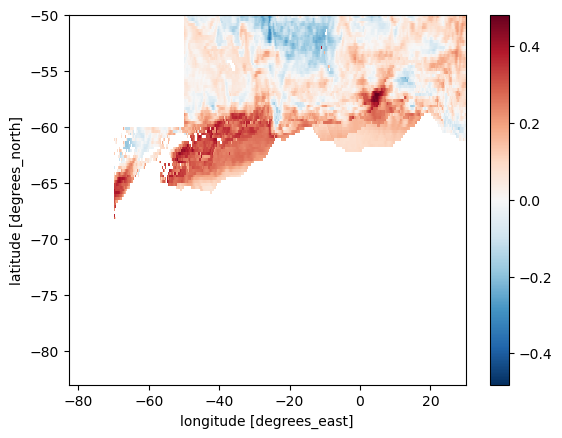

In [65]:
da_cor['SON'].plot()

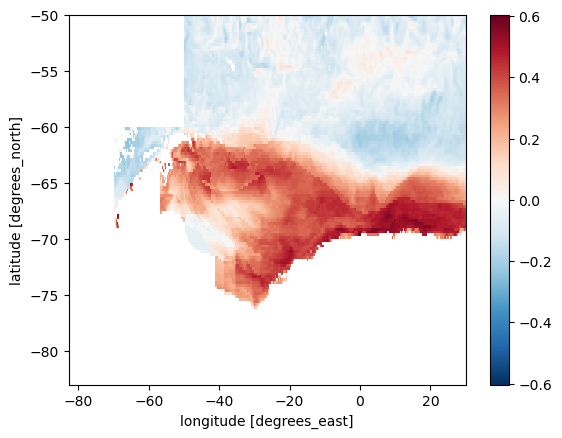

In [64]:
da_cor['MAM'].plot()

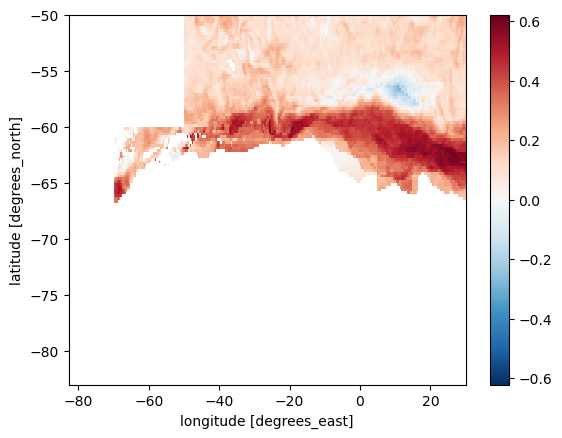

In [63]:
da_cor['JJA'].plot()

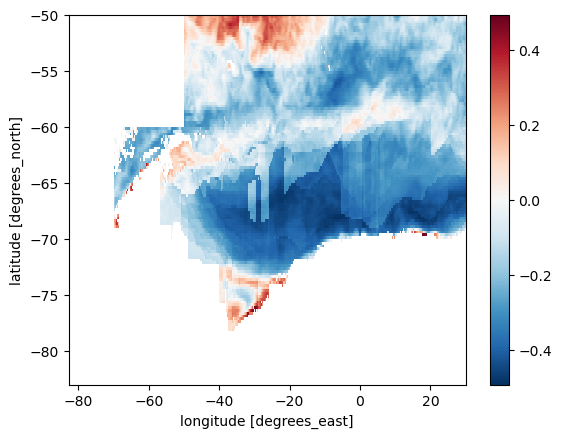

In [62]:
da_cor['DJF'].plot()

In [47]:
for s, da in da_pico.groupby('time.season'):
    print(s)

DJF
JJA
MAM
SON


In [48]:
da

<xarray.DataArray 'sphy' (time: 150, lat: 132, lon: 451)> Size: 36MB
dask.array<getitem, shape=(150, 132, 451), dtype=float32, chunksize=(150, 132, 451), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1kB 1961-09-01 1961-10-01 ... 2010-11-01
  * lat      (lat) float64 1kB -50.12 -50.38 -50.62 ... -82.38 -82.62 -82.88
  * lon      (lon) float64 4kB -82.62 -82.38 -82.12 -81.88 ... 29.38 29.62 29.88
Attributes:
    comment:        vertically integrated over all ocean levels by ISIMIP dat...
    long_name:      Mole Content of Picophytoplankton expressed as Carbon in ...
    standard_name:  mole_content_of_picophytoplankton_expressed_as_carbon_in_...
    units:          mol m-2

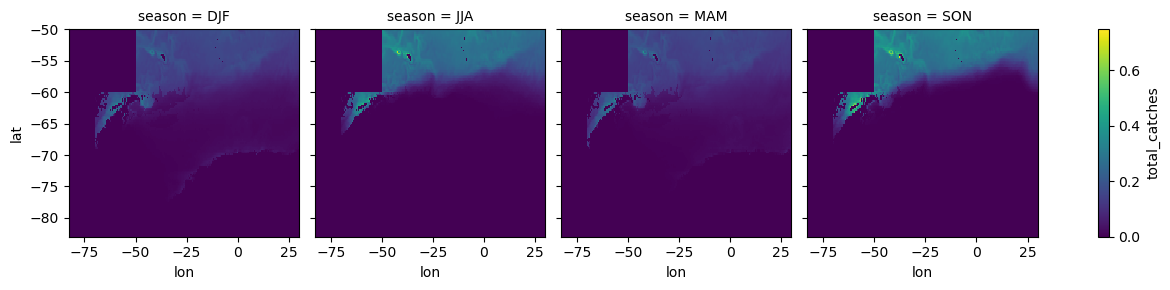

In [46]:
catch.groupby('time.season').mean('time').plot(col = 'season')

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.12/lib/python3.11/site-packages/dask/_task_spec.py:759: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


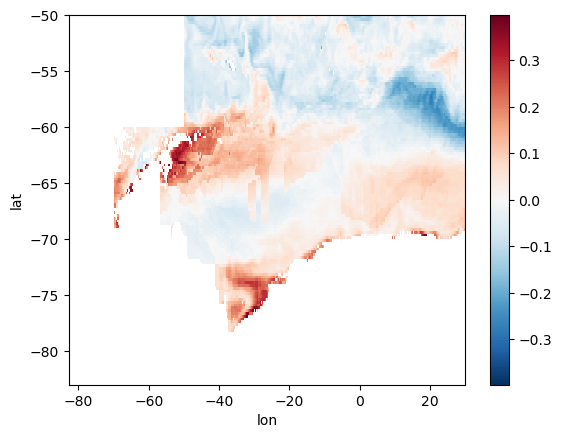

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.12/lib/python3.11/site-packages/dask/_task_spec.py:759: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.12/lib/python3.11/site-packages/dask/array/numpy_compat.py:58: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [43]:
xr.corr(catch, da_pico, dim = 'time').plot()